In [1104]:
import pandas as pd
import numpy as np

# Base de donnée CIR

**Création des deux dataframe sur le CIR qui vont nous être utiles : avec les valeurs du CIR ou seulement 0/1**

In [1105]:
df1 = pd.read_csv ('cir_data1.csv')


In [1172]:
df1 = df1[df1['siren'].astype(str).str.startswith(('4','5','6','8','9'))]
df1.head()

,siren,CIR2016,CIR2017,CIR2018,CIR2019,CIR2020,CIR2021,CIR2022,CIR2023
1736,400054383,0.0,0.0,0.0,0.0,48413.0,0.0,0.0,0.0
1737,400072997,1108172.0,928011.0,1009406.0,1253358.0,1337105.0,1304625.0,204000.0,1086745.0
1739,400132627,0.0,0.0,148850.0,0.0,0.0,0.0,0.0,0.0
1741,400214888,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1742,400256780,91000.0,83000.0,61000.0,28000.0,0.0,85000.0,97000.0,24000.0


In [1173]:
df_CIR_0_1 = df1.copy()
df_CIR_0_1 =df_CIR_0_1.replace('oui', 1)
for col in df_CIR_0_1.columns:
    # Convert the column to string, remove spaces, then convert to float if possible
    df_CIR_0_1[col] = df_CIR_0_1[col].astype(str).str.replace(" ", "")
    df_CIR_0_1[col] = df_CIR_0_1[col].astype(float)
    df_CIR_0_1['siren'] = df_CIR_0_1['siren'].astype(int)
    
# Remplacer les valeurs > 0 par 1 pour les colonnes 2016_CIR à 2023_CIR dans le nouveau DataFrame
columns = ['CIR2016','CIR2017','CIR2018','CIR2019', 'CIR2020', 'CIR2021', 'CIR2022', 'CIR2023']
for column in columns :
    df_CIR_0_1[column] = df_CIR_0_1[column].apply(lambda x: 1 if pd.notnull(x) and x > 0 else x)

df_CIR_0_1= df_CIR_0_1.dropna(subset=['CIR2016', 'CIR2017', 'CIR2018', 'CIR2019', 
                              'CIR2020', 'CIR2021', 'CIR2022', 'CIR2023'])
df_CIR_0_1.head()

,siren,CIR2016,CIR2017,CIR2018,CIR2019,CIR2020,CIR2021,CIR2022,CIR2023
1736,400054383,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1737,400072997,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1739,400132627,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1741,400214888,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1742,400256780,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0


In [1174]:
df1 = df1.replace('oui', np.nan)
for col in df1.columns:
    # Convert the column to string, remove spaces, then convert to float if possible
    df1[col] = df1[col].astype(str).str.replace(" ", "")
    df1[col] = df1[col].astype(float)
    df1 ['siren'] = df1['siren'].astype(int)
# Garder seulement les lignes pour lesquelles toutes les colonnes sont remplies
df1= df1.dropna(subset=['CIR2016', 'CIR2017', 'CIR2018', 'CIR2019', 
                              'CIR2020', 'CIR2021', 'CIR2022', 'CIR2023'])
df1.head()

,siren,CIR2016,CIR2017,CIR2018,CIR2019,CIR2020,CIR2021,CIR2022,CIR2023
1736,400054383,0.0,0.0,0.0,0.0,48413.0,0.0,0.0,0.0
1737,400072997,1108172.0,928011.0,1009406.0,1253358.0,1337105.0,1304625.0,204000.0,1086745.0
1739,400132627,0.0,0.0,148850.0,0.0,0.0,0.0,0.0,0.0
1741,400214888,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1742,400256780,91000.0,83000.0,61000.0,28000.0,0.0,85000.0,97000.0,24000.0


In [1175]:
df_siren = pd.read_csv('probable_CIR_ETI_GE.csv', sep =';', low_memory =False)
df_siren.columns

Index(['siren', 'nic', 'siret', 'statutDiffusionEtablissement',
       'dateCreationEtablissement', 'trancheEffectifsEtablissement',
       'anneeEffectifsEtablissement',
       'activitePrincipaleRegistreMetiersEtablissement',
       'dateDernierTraitementEtablissement', 'etablissementSiege',
       'etatAdministratifUniteLegale', 'statutDiffusionUniteLegale',
       'unitePurgeeUniteLegale', 'dateCreationUniteLegale',
       'categorieJuridiqueUniteLegale', 'denominationUniteLegale',
       'sigleUniteLegale', 'denominationUsuelle1UniteLegale',
       'denominationUsuelle2UniteLegale', 'denominationUsuelle3UniteLegale',
       'sexeUniteLegale', 'nomUniteLegale', 'nomUsageUniteLegale',
       'prenom1UniteLegale', 'prenom2UniteLegale', 'prenom3UniteLegale',
       'prenom4UniteLegale', 'prenomUsuelUniteLegale', 'pseudonymeUniteLegale',
       'activitePrincipaleUniteLegale',
       'nomenclatureActivitePrincipaleUniteLegale',
       'identifiantAssociationUniteLegale',
       'econom

In [1176]:
df2 = pd.merge(df1, df_siren[['siren', 'activitePrincipaleUniteLegale', 'categorieEntreprise', 'dateCreationUniteLegale']], on='siren', how='left')
df2 ['division'] =  df2['activitePrincipaleUniteLegale'].str[:2]  # Extraire les deux premiers caractères
df2['somme_CIR'] = df2['CIR2016'].fillna(0) +df2['CIR2017'].fillna(0) +df2['CIR2018'].fillna(0) +df2['CIR2019'].fillna(0) +df2['CIR2020'].fillna(0) +df2['CIR2021'].fillna(0) +df2['CIR2022'].fillna(0)+df2['CIR2023'].fillna(0)
df2.head()

,siren,CIR2016,CIR2017,CIR2018,CIR2019,CIR2020,CIR2021,CIR2022,CIR2023,activitePrincipaleUniteLegale,categorieEntreprise,dateCreationUniteLegale,division,somme_CIR
0,400054383,0.0,0.0,0.0,0.0,48413.0,0.0,0.0,0.0,71.20B,GE,1994-12-01,71,48413.0
1,400072997,1108172.0,928011.0,1009406.0,1253358.0,1337105.0,1304625.0,204000.0,1086745.0,25.99B,ETI,1995-01-18,25,8231422.0
2,400132627,0.0,0.0,148850.0,0.0,0.0,0.0,0.0,0.0,25.62B,ETI,1995-02-15,25,148850.0
3,400214888,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.11Z,ETI,1995-01-25,25,0.0
4,400256780,91000.0,83000.0,61000.0,28000.0,0.0,85000.0,97000.0,24000.0,20.42Z,GE,1995-03-06,20,469000.0


In [1177]:
df2_0_1 = pd.merge(df_CIR_0_1, df_siren[['siren', 'activitePrincipaleUniteLegale', 'categorieEntreprise', 'dateCreationUniteLegale']], on='siren', how='left')
df2_0_1['division'] = df2_0_1['activitePrincipaleUniteLegale'].str[:2] 
df2_0_1.head()

,siren,CIR2016,CIR2017,CIR2018,CIR2019,CIR2020,CIR2021,CIR2022,CIR2023,activitePrincipaleUniteLegale,categorieEntreprise,dateCreationUniteLegale,division
0,400054383,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,71.20B,GE,1994-12-01,71
1,400072997,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,25.99B,ETI,1995-01-18,25
2,400132627,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,25.62B,ETI,1995-02-15,25
3,400214888,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.11Z,ETI,1995-01-25,25
4,400256780,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,20.42Z,GE,1995-03-06,20


In [1178]:
# Liste des colonnes à vérifier (les années de 2016 à 2023)
cir_columns = ['CIR2016', 'CIR2017', 'CIR2018', 'CIR2019', 'CIR2020', 'CIR2021', 'CIR2022', 'CIR2023']

# Supprimer les lignes où toutes les colonnes CIR (de 2016 à 2023) sont NaN
df_cleaned = df2.dropna(subset=cir_columns, how='all')
df_cleaned_0_1 = df2_0_1.dropna(subset=cir_columns, how='all')
df_cleaned.columns

Index(['siren', 'CIR2016', 'CIR2017', 'CIR2018', 'CIR2019', 'CIR2020',
       'CIR2021', 'CIR2022', 'CIR2023', 'activitePrincipaleUniteLegale',
       'categorieEntreprise', 'dateCreationUniteLegale', 'division',
       'somme_CIR'],
      dtype='object')

# Statistiques descriptives

CIR2016    7.772842e+08
CIR2017    9.843486e+08
CIR2018    9.098071e+08
CIR2019    1.017152e+09
CIR2020    1.120438e+09
CIR2021    1.285349e+09
CIR2022    7.907973e+08
CIR2023    1.091871e+09
dtype: float64


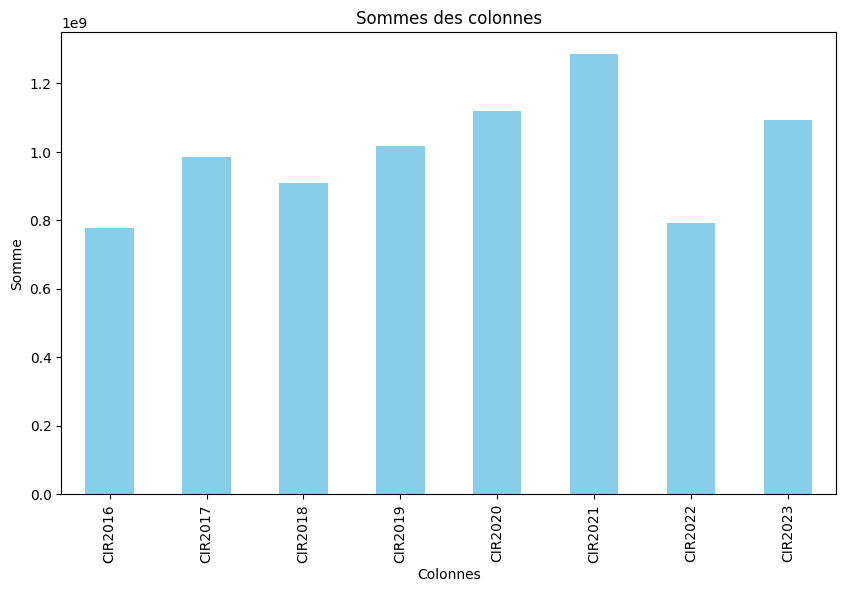

In [1179]:
import matplotlib.pyplot as plt

# Calculer la somme de chaque colonne sauf 'siren'
col_sums = df1.drop(columns='siren').sum()
print (col_sums)
# Créer l'histogramme
plt.figure(figsize=(10, 6))
col_sums.plot(kind='bar', color='skyblue')
plt.title("Sommes des colonnes")
plt.xlabel("Colonnes")
plt.ylabel("Somme")

# Afficher l'histogramme
plt.show()

                  ETI            GE
CIR2016  2.700037e+08  5.072805e+08
CIR2017  3.112574e+08  6.730912e+08
CIR2018  3.074898e+08  6.023173e+08
CIR2019  3.094733e+08  7.076783e+08
CIR2020  3.429772e+08  7.774611e+08
CIR2021  3.394216e+08  9.459279e+08
CIR2022  3.566401e+08  4.341572e+08
CIR2023  4.668877e+08  6.249836e+08
           ETI_moyenne    GE_moyenne
CIR2016  257146.420983  1.054637e+06
CIR2017  296435.577439  1.399358e+06
CIR2018  292847.474010  1.252219e+06
CIR2019  294736.500419  1.471265e+06
CIR2020  326644.984384  1.616343e+06
CIR2021  323258.640286  1.966586e+06
CIR2022  339657.229957  9.026137e+05
CIR2023  444654.979940  1.299342e+06


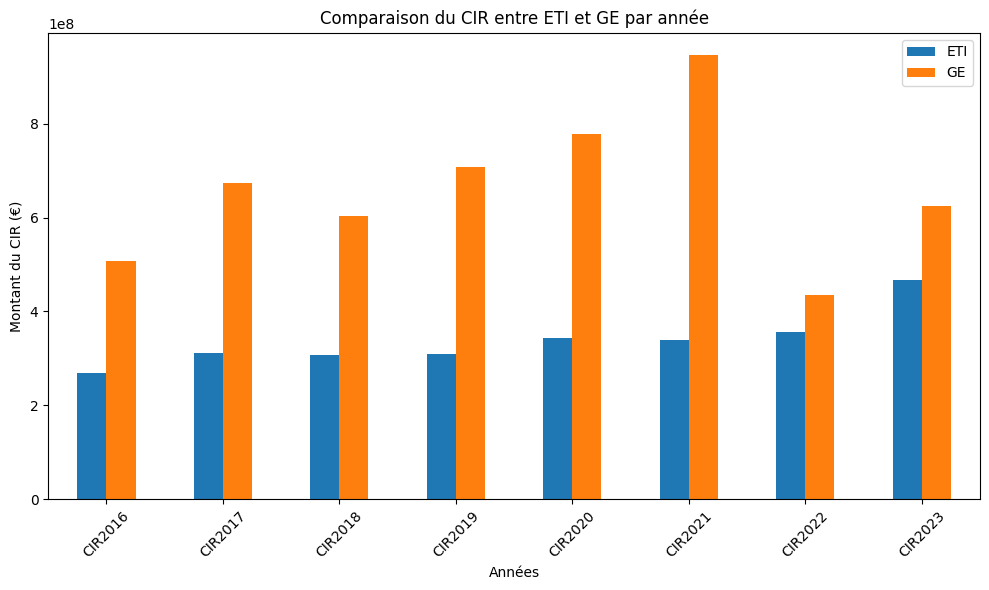

In [1180]:
import pandas as pd

# Supposons que votre DataFrame ressemble à ceci :
# df contient les colonnes : 'siren', 'categorieEntreprise', '2016_CIR', '2017_CIR', ..., '2023_CIR'
# 'categorieEntreprise' doit contenir des valeurs comme 'ETI' et 'GE'.

# Filtrer les données en fonction de la catégorie d'entreprise
df_eti = df2[df2['categorieEntreprise'] == 'ETI']
df_ge = df2[df2['categorieEntreprise'] == 'GE']

# Calculer la somme du CIR pour chaque année pour chaque type d'entreprise
# Nous allons exclure les colonnes 'siren' et 'categorieEntreprise' pour le calcul des sommes.
eti_cir = df_eti.drop(columns=['siren', 'activitePrincipaleUniteLegale','categorieEntreprise', 'dateCreationUniteLegale','division', 'somme_CIR']).sum()
ge_cir = df_ge.drop(columns=['siren', 'activitePrincipaleUniteLegale', 'categorieEntreprise', 'dateCreationUniteLegale','division', 'somme_CIR']).sum()

# Créer un DataFrame avec les résultats pour la comparaison'
comparaison = pd.DataFrame({
    'ETI': eti_cir,
    'GE': ge_cir
})

# Afficher la comparaison
print(comparaison)

# Si vous voulez calculer des statistiques comme la moyenne, l'écart-type, etc.
eti_mean = df_eti.drop(columns=['siren', 'activitePrincipaleUniteLegale','categorieEntreprise', 'dateCreationUniteLegale','division', 'somme_CIR']).mean()
ge_mean = df_ge.drop(columns=['siren','activitePrincipaleUniteLegale', 'categorieEntreprise', 'dateCreationUniteLegale','division', 'somme_CIR']).mean()

# Créer un DataFrame pour afficher les moyennes
moyenne_comparaison = pd.DataFrame({
    'ETI_moyenne': eti_mean,
    'GE_moyenne': ge_mean
})

# Afficher la moyenne du CIR pour chaque année
print(moyenne_comparaison)

# Vous pouvez aussi visualiser cette comparaison sous forme de graphique (si nécessaire)
import matplotlib.pyplot as plt

# Comparaison sous forme de graphique pour chaque année
comparaison.plot(kind='bar', figsize=(10, 6))
plt.title('Comparaison du CIR entre ETI et GE par année')
plt.ylabel('Montant du CIR (€)')
plt.xlabel('Années')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

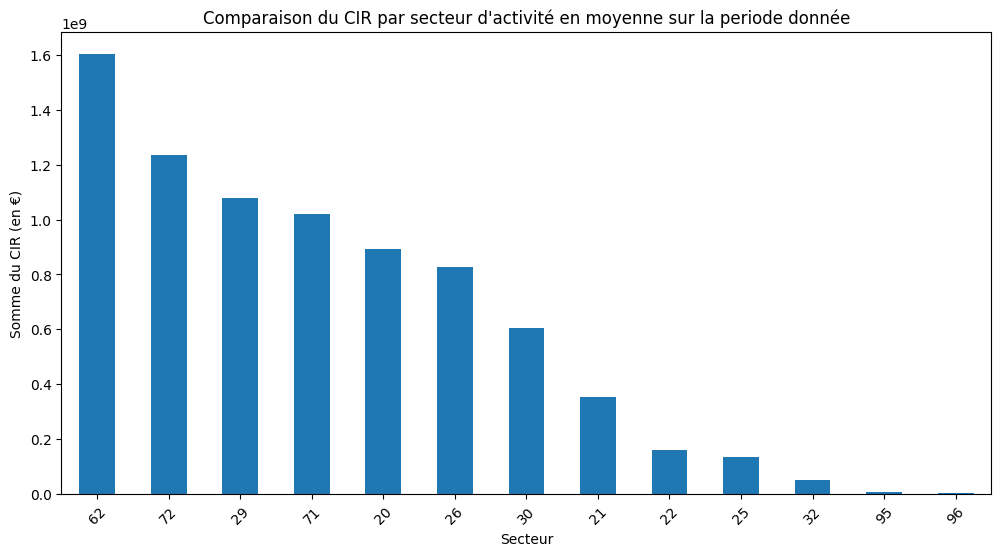

In [1181]:
# Calculer la somme du CIR par secteur
secteur_cir = df2.groupby('division')['somme_CIR'].sum().sort_values(ascending=False)

# Visualisation sous forme de barres
secteur_cir.plot(kind='bar', figsize=(12, 6))
plt.title('Comparaison du CIR par secteur d\'activité en moyenne sur la periode donnée')
plt.xlabel('Secteur')
plt.ylabel('Somme du CIR (en €)')
plt.xticks(rotation=45)
plt.show()

In [1182]:
# Sauvegarder le DataFrame mis à jour dans le fichier CSV
df2.to_csv('cir_5_6_9_finie.CSV', index=False)

print(f"Fichier '{'cir_5_6_9_finie.csv'}' mis à jour avec succès.")

Fichier 'cir_5_6_9_finie.csv' mis à jour avec succès.


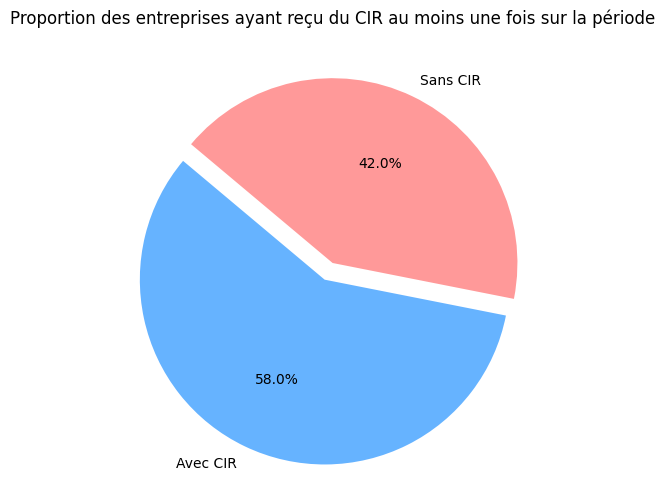

In [1183]:
import matplotlib.pyplot as plt
#df2['somme_CIR'] = df2['somme_CIR'].fillna(0)
# Calculer le nombre d'entreprises qui ne reçoivent pas de CIR (soit 0, soit NaN à l'origine) ???

# Comptage des entreprises avec et sans CIR
entreprises_avec_CIR = len(df2[df2['somme_CIR'] > 0])
entreprises_sans_CIR = len(df2[df2['somme_CIR'] == 0])

# Données pour le camembert
labels = ['Avec CIR', 'Sans CIR']
sizes = [entreprises_avec_CIR, entreprises_sans_CIR]
colors = ['#66b3ff', '#ff9999']
explode = (0.1, 0)  # Mettre en valeur la part 'Avec CIR'

# Création du diagramme en camembert
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Proportion des entreprises ayant reçu du CIR au moins une fois sur la période')
plt.show()

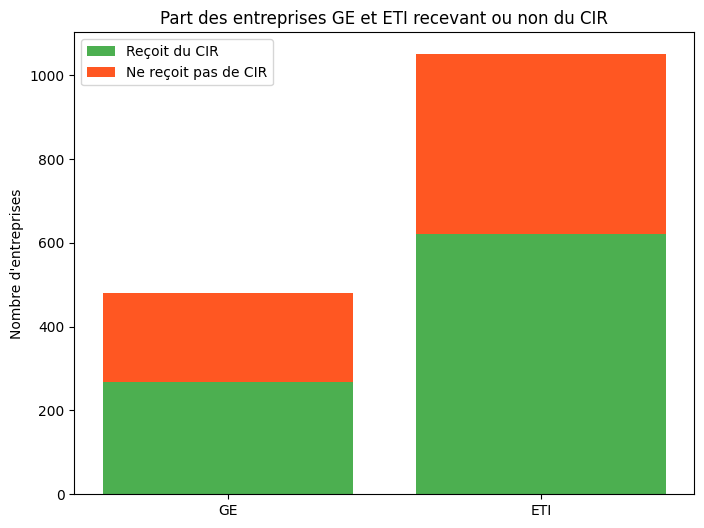

In [1184]:
import matplotlib.pyplot as plt

# Filtrer les données pour chaque catégorie
total_GE = df2[df2['categorieEntreprise'] == 'GE'].shape[0]
total_ETI = df2[df2['categorieEntreprise'] == 'ETI'].shape[0]

# Comptage des entreprises GE et ETI recevant ou non du CIR
GE_recevant_CIR = df2[(df2['categorieEntreprise'] == 'GE') & (df2['somme_CIR'] > 0)].shape[0]
ETI_recevant_CIR = df2[(df2['categorieEntreprise'] == 'ETI') & (df2['somme_CIR'] > 0)].shape[0]
GE_sans_CIR = total_GE - GE_recevant_CIR
ETI_sans_CIR = total_ETI - ETI_recevant_CIR

# Préparer les données pour l'histogramme empilé
categories = ['GE', 'ETI']
recevant_CIR = [GE_recevant_CIR, ETI_recevant_CIR]
sans_CIR = [GE_sans_CIR, ETI_sans_CIR]

# Création de l'histogramme empilé
plt.figure(figsize=(8, 6))
plt.bar(categories, recevant_CIR, label='Reçoit du CIR', color='#4CAF50')
plt.bar(categories, sans_CIR, bottom=recevant_CIR, label='Ne reçoit pas de CIR', color='#FF5722')

# Ajouter les labels et légende
plt.ylabel('Nombre d\'entreprises')
plt.title('Part des entreprises GE et ETI recevant ou non du CIR')
plt.legend()

# Affichage
plt.show()

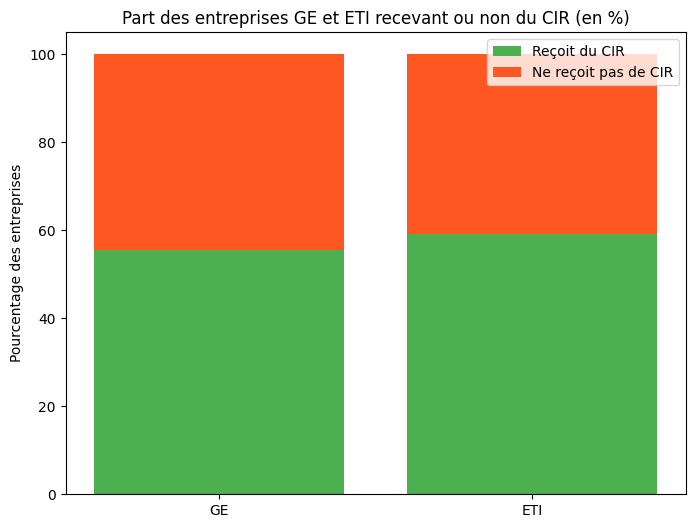

In [1185]:
import matplotlib.pyplot as plt

# Filtrer les données pour chaque catégorie
total_GE = df2[df2['categorieEntreprise'] == 'GE'].shape[0]
total_ETI = df2[df2['categorieEntreprise'] == 'ETI'].shape[0]

# Comptage des entreprises GE et ETI recevant ou non du CIR
GE_recevant_CIR = df2[(df2['categorieEntreprise'] == 'GE') & (df2['somme_CIR'] > 0)].shape[0]
ETI_recevant_CIR = df2[(df2['categorieEntreprise'] == 'ETI') & (df2['somme_CIR'] > 0)].shape[0]
GE_sans_CIR = total_GE - GE_recevant_CIR
ETI_sans_CIR = total_ETI - ETI_recevant_CIR

# Convertir les comptages en pourcentages
GE_recevant_CIR_pct = GE_recevant_CIR / total_GE * 100 if total_GE > 0 else 0
GE_sans_CIR_pct = GE_sans_CIR / total_GE * 100 if total_GE > 0 else 0
ETI_recevant_CIR_pct = ETI_recevant_CIR / total_ETI * 100 if total_ETI > 0 else 0
ETI_sans_CIR_pct = ETI_sans_CIR / total_ETI * 100 if total_ETI > 0 else 0

# Préparer les données pour l'histogramme empilé en pourcentages
categories = ['GE', 'ETI']
recevant_CIR_pct = [GE_recevant_CIR_pct, ETI_recevant_CIR_pct]
sans_CIR_pct = [GE_sans_CIR_pct, ETI_sans_CIR_pct]

# Création de l'histogramme empilé en pourcentages
plt.figure(figsize=(8, 6))
plt.bar(categories, recevant_CIR_pct, label='Reçoit du CIR', color='#4CAF50')
plt.bar(categories, sans_CIR_pct, bottom=recevant_CIR_pct, label='Ne reçoit pas de CIR', color='#FF5722')

# Ajouter les labels et légende
plt.ylabel('Pourcentage des entreprises')
plt.title('Part des entreprises GE et ETI recevant ou non du CIR (en %)')
plt.legend()

# Affichage
plt.show()

In [1186]:
categorie_count = df2['categorieEntreprise'].value_counts()
categorie_count

categorieEntreprise
ETI    1050
GE      481
Name: count, dtype: int64

# Base de données brevets

In [1187]:
df_patents_9 = pd.read_csv('BREVETS_siren9.csv', sep =';')
df_patents_9.nunique()

SIREN               27
Famille ID        1166
Brevet            7379
Date de Dépôt     2109
Année de Dépôt      71
2016                 2
2017                 2
2018                 2
2019                 2
2020                 2
2021                 2
2022                 2
2023                 1
2024                 1
dtype: int64

In [1188]:
df_patents_6 = pd.read_csv('BREVETS_siren6.csv', sep =';')
df_patents_6.nunique()

SIREN                91
Famille ID         5391
Brevet            30226
Date de Dépôt      6605
Année de Dépôt       94
2016                  2
2017                  2
2018                  2
2019                  2
2020                  2
2021                  2
2022                  2
2023                  1
2024                  1
dtype: int64

In [1189]:
df_patents_5 = pd.read_csv('BREVETS_5.csv')
df_patents_5['SIREN'] = df_patents_5['SIREN'].astype(str)

# Filtrer les lignes où 'siren' commence par '5'
df_patents_5= df_patents_5[df_patents_5['SIREN'].str.startswith('5')]
df_patents_5.nunique()

SIREN                269
Famille ID         40619
Brevet            131488
Date de Dépôt      12214
Année de Dépôt       124
2016                   2
2017                   2
2018                   2
2019                   2
2020                   2
2021                   2
2022                   2
2023                   1
2024                   1
dtype: int64

In [1190]:
df_patents_4 = pd.read_csv('BREVETS_siren4.csv',sep =';')
df_patents_4['SIREN'] = df_patents_4['SIREN'].astype(str)
df_patents_4.nunique()

SIREN               475
Famille ID        21991
Brevet            95776
Date de Dépôt     13051
Année de Dépôt       98
2016                  2
2017                  2
2018                  2
2019                  2
2020                  2
2021                  2
2022                  2
2023                  1
2024                  1
dtype: int64

In [1191]:
df_patents_8 =pd.read_csv('BREVETS_siren8.csv',sep=';')
df_patents_8['SIREN'] = df_patents_8['SIREN'].astype(str)
df_patents_9.nunique()

SIREN               27
Famille ID        1166
Brevet            7379
Date de Dépôt     2109
Année de Dépôt      71
2016                 2
2017                 2
2018                 2
2019                 2
2020                 2
2021                 2
2022                 2
2023                 1
2024                 1
dtype: int64

In [1192]:
df_patents = pd.concat([df_patents_4, df_patents_5, df_patents_6,df_patents_8, df_patents_9], axis=0, ignore_index=True)

df_patents = df_patents[['SIREN', 'Famille ID','Brevet', 'Année de Dépôt']]
df_patents = df_patents.dropna(subset=['Année de Dépôt'])
df_patents['Année de Dépôt'] = df_patents['Année de Dépôt'].astype(int)
df_patents = df_patents[df_patents['Année de Dépôt'] >= 2016]

df_patents.to_csv('brevet_6_5_9.CSV', index=False)

print(f"Fichier '{'brevet_6_5_9.CSV'}' mis à jour avec succès.")
df_patents

Fichier 'brevet_6_5_9.CSV' mis à jour avec succès.


,SIREN,Famille ID,Brevet,Année de Dépôt
8,400 741 740,56101651.0,FR3049810B1,2016
10,400 741 740,56101651.0,FR3049810A1,2016
27,401 190 376,69190921.0,FR3101273B1,2019
28,401 190 376,57348982.0,FR3056195B1,2016
31,401 190 376,59859170.0,FR3066476A1,2017
...,...,...,...,...
271485,986 120 186,46420427.0,US10087308B2,2016
271506,986 120 186,46420427.0,US2019194424A1,2018
271512,986 120 186,46420427.0,US2017121500A1,2016
271523,900 011 644,68806817.0,EP3962311A1,2020


In [1193]:
df_grouped = df_patents.groupby('Famille ID').agg({
    'SIREN': 'first',  # Prendre la première valeur (supposons que le SIREN est identique pour chaque famille)
    'Brevet': lambda x: ', '.join(x),  # Joindre les brevets par une virgule
    'Année de Dépôt': 'min',  # Même logique pour l'année de dépôt

}).reset_index()
df_grouped

,Famille ID,SIREN,Brevet,Année de Dépôt
0,8228630.0,673 620 399,"US2017145524A1, US2017137900A1",2016
1,8857237.0,562 038 893,US2019071649A1,2018
2,8862040.0,433 924 529,US2018070990A1,2017
3,8862055.0,590 800 215,"NL300806I2, CY1117676T1, LU93048I2",2016
4,8862982.0,433 924 529,"US2018098859A1, US2016324655A1, US9788964B2",2016
...,...,...,...,...
20329,83406713.0,504 940 925,CN115150085A,2022
20330,83407056.0,414 969 584,CN115149821A,2022
20331,83407065.0,504 940 925,CN115146306A,2022
20332,83407151.0,504 940 925,CN115146290A,2022


In [1194]:
# Définir les années pour lesquelles on souhaite créer les colonnes
years = list(range(2016, 2025))

# Créer une colonne pour chaque année avec des valeurs par défaut à 0
for year in years:
    df_grouped[year] = 0

# Mettre un 1 dans la colonne de l'année de dépôt correspondante
for index, row in df_grouped.iterrows():
    year = row['Année de Dépôt']
    if year in years:
        df_grouped.at[index, year] = 1

In [1195]:
df_grouped.head(10)

,Famille ID,SIREN,Brevet,Année de Dépôt,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,8228630.0,673 620 399,"US2017145524A1, US2017137900A1",2016,1,0,0,0,0,0,0,0,0
1,8857237.0,562 038 893,US2019071649A1,2018,0,0,1,0,0,0,0,0,0
2,8862040.0,433 924 529,US2018070990A1,2017,0,1,0,0,0,0,0,0,0
3,8862055.0,590 800 215,"NL300806I2, CY1117676T1, LU93048I2",2016,1,0,0,0,0,0,0,0,0
4,8862982.0,433 924 529,"US2018098859A1, US2016324655A1, US9788964B2",2016,1,0,0,0,0,0,0,0,0
5,8865491.0,433 924 529,US2017319354A1,2017,0,1,0,0,0,0,0,0,0
6,8868449.0,433 924 529,"US9987044B2, US2017196596A1",2017,0,1,0,0,0,0,0,0,0
7,8870441.0,433 924 529,"US9943339B2, US2016317190A1, US9561056B2, US20...",2016,1,0,0,0,0,0,0,0,0
8,8879905.0,414 815 217,"FR3106158B1, FR3106158A1",2020,0,0,0,0,1,0,0,0,0
9,9951976.0,622 037 083,US2017127681A1,2017,0,1,0,0,0,0,0,0,0


In [1196]:
df_grouped = df_grouped.groupby('SIREN').agg(
    {**{col: 'sum' for col in [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]},  # Somme des colonnes CIR
     'Famille ID': lambda x: ', '.join(map(str, x)),  # Concaténation des Famille ID après conversion en str
     'Année de Dépôt': lambda x: ', '.join(map(str, x))  # Concaténation des Année de Dépôt après conversion en str
    }).reset_index()

df_grouped.rename(columns={'SIREN': 'siren', 2016 : 'brevets2016', 2017 : 'brevets2017', 2018 : 'brevets2018', 2019 : 'brevets2019', 2020 : 'brevets2020', 2021 : 'brevets2021', 2022 : 'brevets2022', 2023 : 'brevets2023', 2024 : 'brevets2024'}, inplace=True)
df_grouped.head()

,siren,brevets2016,brevets2017,brevets2018,brevets2019,brevets2020,brevets2021,brevets2022,brevets2023,brevets2024,Famille ID,Année de Dépôt
0,400 741 740,1,0,0,0,0,0,0,0,0,56101651.0,2016
1,401 190 376,2,1,0,2,0,0,0,0,0,"57348982.0, 58213243.0, 59859170.0, 69190921.0...","2016, 2016, 2017, 2019, 2019"
2,401 513 056,0,2,1,0,0,0,0,0,0,"58455328.0, 58501736.0, 61168015.0","2017, 2017, 2018"
3,401 733 589,1,0,1,0,0,0,0,0,0,"53496790.0, 63579479.0","2016, 2018"
4,401 791 959,6,4,5,3,2,0,0,0,0,"49880649.0, 50137860.0, 50179779.0, 51894136.0...","2016, 2016, 2016, 2017, 2016, 2016, 2016, 2017..."


In [1197]:
df_grouped['siren'] = df_grouped['siren'].astype(str).str.replace(' ', '').astype(int)

In [1198]:
df_merged = pd.merge(df_grouped, df_cleaned, on='siren', how='left')
df_merged['categorieEntreprise'] = df_merged['categorieEntreprise'].apply(lambda x: 0 if x == 'GE' else 1)
df_merged['dateCreationUniteLegale'] = pd.to_datetime(df_merged['dateCreationUniteLegale']).dt.year

In [1199]:
df_merged.head()

,siren,brevets2016,brevets2017,brevets2018,brevets2019,brevets2020,brevets2021,brevets2022,brevets2023,brevets2024,...,CIR2019,CIR2020,CIR2021,CIR2022,CIR2023,activitePrincipaleUniteLegale,categorieEntreprise,dateCreationUniteLegale,division,somme_CIR
0,400741740,1,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN
1,401190376,2,1,0,2,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN
2,401513056,0,2,1,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN
3,401733589,1,0,1,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN
4,401791959,6,4,5,3,2,0,0,0,0,...,1433081.0,1512497.0,695431.0,600090.0,62500.0,71.12B,1,1995.0,71,8817428.0


In [1200]:
# Créer une copie du DataFrame
df_0_1 = df_merged.copy()

# Remplacer les valeurs > 0 par 1 pour les colonnes 2016_CIR à 2023_CIR dans le nouveau DataFrame
columns = ['CIR2016','CIR2017','CIR2018','CIR2019', 'CIR2020', 'CIR2021', 'CIR2022', 'CIR2023']
for column in columns :
    df_0_1[column] = df_0_1[column].apply(lambda x: 1 if x > 0 else 0)

df_0_1['division'] = df_0_1['division'].astype(str)
df_0_1

,siren,brevets2016,brevets2017,brevets2018,brevets2019,brevets2020,brevets2021,brevets2022,brevets2023,brevets2024,...,CIR2019,CIR2020,CIR2021,CIR2022,CIR2023,activitePrincipaleUniteLegale,categorieEntreprise,dateCreationUniteLegale,division,somme_CIR
0,400741740,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,NaN,1,NaN,nan,NaN
1,401190376,2,1,0,2,0,0,0,0,0,...,0,0,0,0,0,NaN,1,NaN,nan,NaN
2,401513056,0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,NaN,1,NaN,nan,NaN
3,401733589,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,NaN,1,NaN,nan,NaN
4,401791959,6,4,5,3,2,0,0,0,0,...,1,1,1,1,1,71.12B,1,1995.0,71,8817428.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532,964200497,8,4,5,2,2,2,0,0,0,...,0,1,1,1,0,20.59Z,0,1964.0,20,3646300.00
533,967505967,16,19,20,18,15,3,0,0,0,...,0,0,0,0,0,NaN,1,NaN,nan,NaN
534,971509070,24,11,11,10,11,2,0,0,0,...,0,1,1,1,0,20.16Z,0,1971.0,20,696321.22
535,973504509,0,0,1,0,1,1,0,0,0,...,0,0,0,0,0,NaN,1,NaN,nan,NaN


# Statistiques descriptives

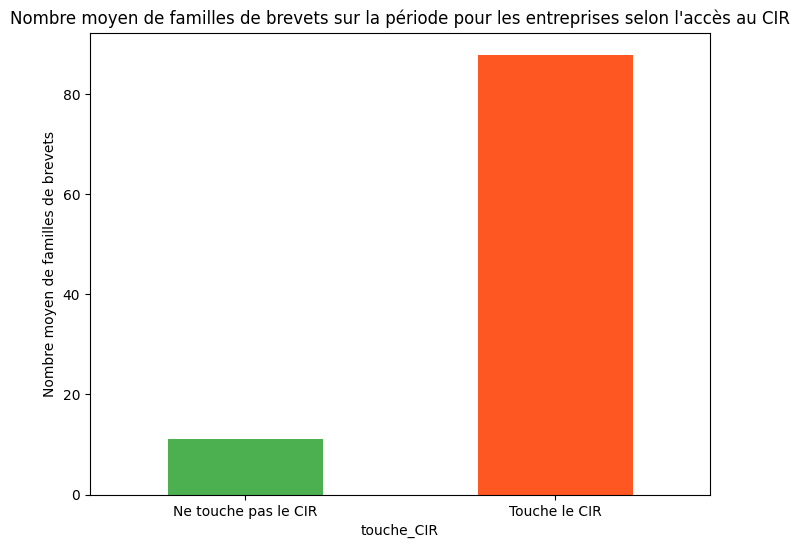

In [1135]:
# Déterminer si une entreprise touche du CIR
df_0_1['touche_CIR'] = df_0_1[['CIR2019', 'CIR2020', 'CIR2021', 'CIR2022', 'CIR2023']].sum(axis=1) > 0

# Calculer le nombre moyen de familles de brevets de 2016 à 2024 pour chaque entreprise
annees_brevets = [f'brevets{year}' for year in range(2016, 2025)]
df_0_1['somme_brevets'] = df_0_1[annees_brevets].sum(axis=1)

# Calculer la moyenne des familles de brevets pour chaque groupe (avec ou sans CIR)
moyenne_brevets_par_CIR = df_0_1.groupby('touche_CIR')['somme_brevets'].mean()

# Tracer le graphique
plt.figure(figsize=(8, 6))
moyenne_brevets_par_CIR.plot(kind='bar', color=['#4CAF50', '#FF5722'], legend=False)
plt.title("Nombre moyen de familles de brevets sur la période pour les entreprises selon l'accès au CIR")
plt.ylabel("Nombre moyen de familles de brevets")
plt.xticks(ticks=[0, 1], labels=["Ne touche pas le CIR", "Touche le CIR"], rotation=0)
plt.show()

In [1136]:
df_0_1

,siren,brevets2016,brevets2017,brevets2018,brevets2019,brevets2020,brevets2021,brevets2022,brevets2023,brevets2024,...,CIR2021,CIR2022,CIR2023,activitePrincipaleUniteLegale,categorieEntreprise,dateCreationUniteLegale,division,somme_CIR,touche_CIR,somme_brevets
0,400741740,1,0,0,0,0,0,0,0,0,...,0,0,0,NaN,1,NaN,nan,NaN,False,1
1,401190376,2,1,0,2,0,0,0,0,0,...,0,0,0,NaN,1,NaN,nan,NaN,False,5
2,401513056,0,2,1,0,0,0,0,0,0,...,0,0,0,NaN,1,NaN,nan,NaN,False,3
3,401733589,1,0,1,0,0,0,0,0,0,...,0,0,0,NaN,1,NaN,nan,NaN,False,2
4,401791959,6,4,5,3,2,0,0,0,0,...,1,1,1,71.12B,1,1995.0,71,8817428.00,True,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532,964200497,8,4,5,2,2,2,0,0,0,...,1,1,0,20.59Z,0,1964.0,20,3646300.00,True,23
533,967505967,16,19,20,18,15,3,0,0,0,...,0,0,0,NaN,1,NaN,nan,NaN,False,91
534,971509070,24,11,11,10,11,2,0,0,0,...,1,1,0,20.16Z,0,1971.0,20,696321.22,True,69
535,973504509,0,0,1,0,1,1,0,0,0,...,0,0,0,NaN,1,NaN,nan,NaN,False,3


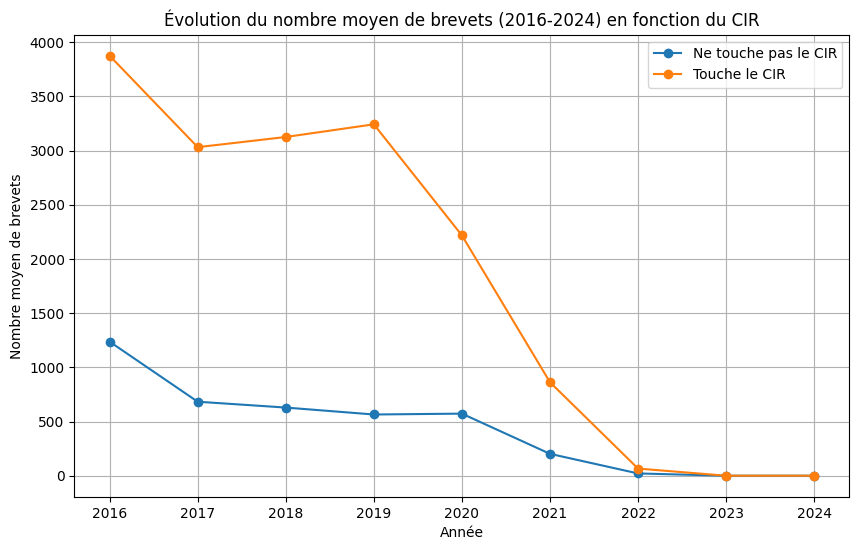

In [1137]:
import pandas as pd
import matplotlib.pyplot as plt

# Colonnes des brevets pour chaque année
colonnes_brevets = [f'brevets{annee}' for annee in range(2016, 2025)]

# Calculer la moyenne des brevets pour chaque année et chaque catégorie de CIR
moyenne_brevets = df_0_1.groupby('touche_CIR')[colonnes_brevets].sum().T

# Renommer les colonnes pour mieux identifier les catégories dans le graphique
moyenne_brevets.columns = ['Ne touche pas le CIR', 'Touche le CIR']

# Renommer les index (colonnes de brevets) pour afficher les années en ordonnée
moyenne_brevets.index = range(2016, 2025)

# Tracer l'évolution des brevets dans le temps pour chaque catégorie de CIR
plt.figure(figsize=(10, 6))
plt.plot(moyenne_brevets.index, moyenne_brevets['Ne touche pas le CIR'], label='Ne touche pas le CIR', marker='o')
plt.plot(moyenne_brevets.index, moyenne_brevets['Touche le CIR'], label='Touche le CIR', marker='o')
plt.xlabel("Année")
plt.ylabel("Nombre moyen de brevets")
plt.title("Évolution du nombre moyen de brevets (2016-2024) en fonction du CIR")
plt.legend()
plt.grid(True)
plt.show()

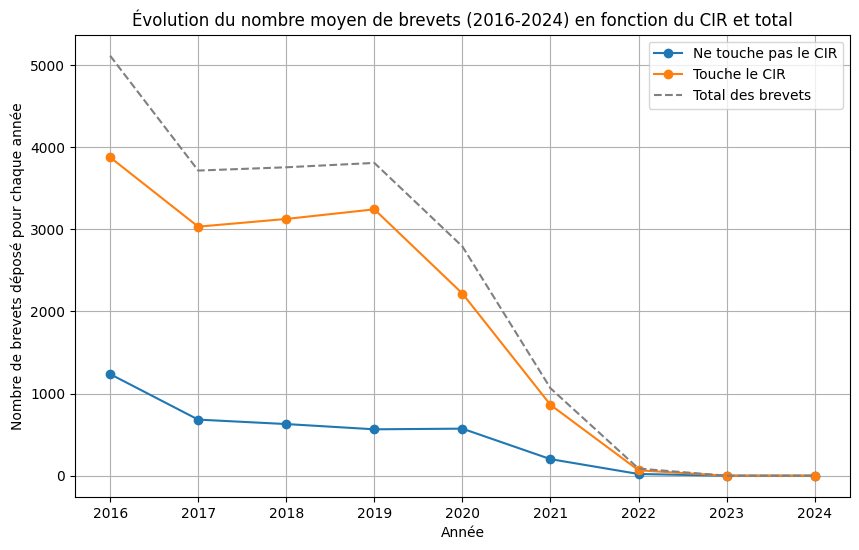

In [1138]:
import pandas as pd
import matplotlib.pyplot as plt

# Colonnes des brevets pour chaque année
colonnes_brevets = [f'brevets{annee}' for annee in range(2016, 2025)]

# Calculer la somme des brevets pour chaque année et chaque catégorie de CIR
somme_brevets = df_0_1.groupby('touche_CIR')[colonnes_brevets].sum().T

# Renommer les colonnes pour mieux identifier les catégories dans le graphique
somme_brevets.columns = ['Ne touche pas le CIR', 'Touche le CIR']

# Renommer les index (colonnes de brevets) pour afficher les années en ordonnée
somme_brevets.index = range(2016, 2025)

# Calculer le nombre total de brevets pour chaque année (somme de tous les brevets)
total_brevets = df_0_1[colonnes_brevets].sum().T
total_brevets.index = range(2016, 2025)  # Assurez-vous que l'index correspond à l'année

# Tracer l'évolution des brevets dans le temps pour chaque catégorie de CIR
plt.figure(figsize=(10, 6))

# Tracer les courbes pour chaque catégorie de CIR
plt.plot(somme_brevets.index, somme_brevets['Ne touche pas le CIR'], label='Ne touche pas le CIR', marker='o')
plt.plot(somme_brevets.index, somme_brevets['Touche le CIR'], label='Touche le CIR', marker='o')

# Tracer la courbe pour le nombre total de brevets
plt.plot(total_brevets.index, total_brevets, label='Total des brevets', linestyle='--', color='gray')

# Ajouter les labels et le titre
plt.xlabel("Année")
plt.ylabel("Nombre de brevets déposé pour chaque année")
plt.title("Évolution du nombre moyen de brevets (2016-2024) en fonction du CIR et total")

# Ajouter la légende
plt.legend()

# Ajouter la grille pour faciliter la lecture du graphique
plt.grid(True)

# Afficher le graphique
plt.show()

In [1139]:
# Calcul du nombre moyen de brevets pour chaque division
brevets_par_division = df_0_1.groupby('division')['somme_brevets'].mean().reset_index()
brevets_par_division = brevets_par_division.sort_values(by='somme_brevets', ascending=False)

/var/folders/1x/8mn2n5ks0mnb44wq8yxkmm5m0000gn/T/ipykernel_3045/3922784291.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=brevets_par_division, x='division', y='somme_brevets', palette="viridis")


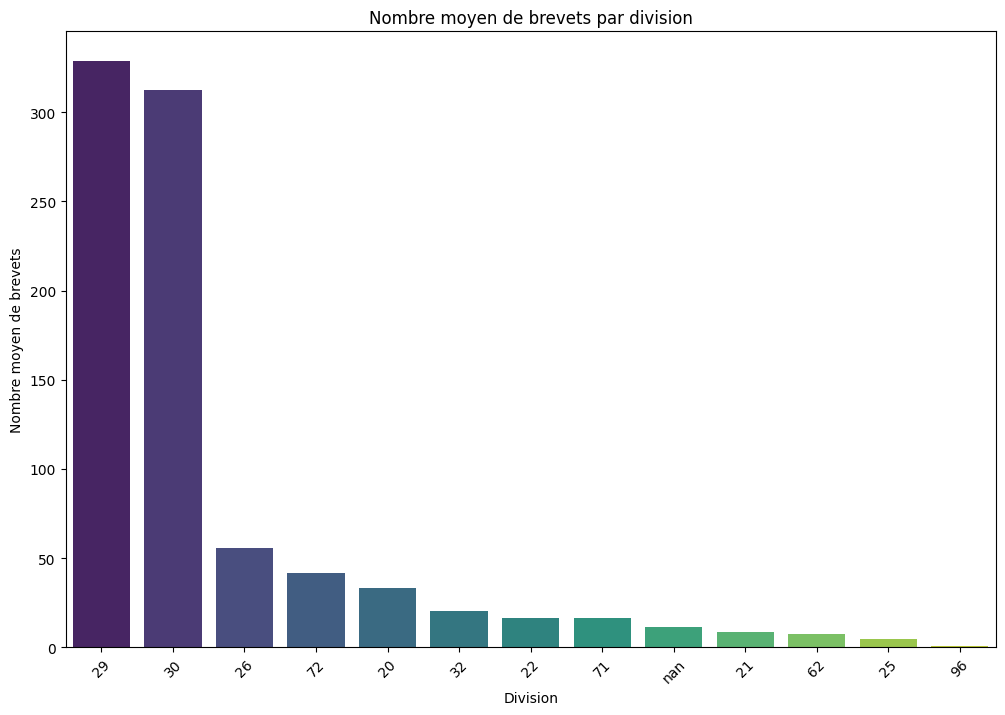

In [1140]:
import seaborn as sns
# Configurer la taille de la figure
plt.figure(figsize=(12, 8))

# Créer le graphique en barres
sns.barplot(data=brevets_par_division, x='division', y='somme_brevets', palette="viridis")

# Ajouter des labels et un titre
plt.title("Nombre moyen de brevets par division")
plt.xlabel("Division")
plt.ylabel("Nombre moyen de brevets")

# Afficher le graphique
plt.xticks(rotation=45)  # Rotation des labels si nécessaire
plt.show()


# Première régression

In [1141]:
import statsmodels.formula.api as smf

# Assurez-vous que la variable Division est catégorielle
df_0_1['division'] = df_0_1['division'].astype('category')

# Construire la formule avec un `+` entre les variables
formula = 'CIR2022 ~ C(division,Treatment("72")) + brevets2016 + categorieEntreprise + dateCreationUniteLegale'

# Ajuster le modèle OLS avec la formule
reg = smf.ols(formula=formula, data=df_0_1).fit()

# Résumé des résultats
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                CIR2022   R-squared:                       0.104
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     1.784
Date:                Wed, 13 Nov 2024   Prob (F-statistic):             0.0424
Time:                        14:46:32   Log-Likelihood:                -145.50
No. Observations:                 231   AIC:                             321.0
Df Residuals:                     216   BIC:                             372.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

# Réalisation d'un panel

**Réalisation d'un panel avec 0/1 comme valeurs pour le CIR**

In [1142]:
df_melted_CIR_0_1 = pd.melt(df_cleaned_0_1, 
                    id_vars=['siren', 'division', 'categorieEntreprise', 'dateCreationUniteLegale'],  # Colonnes à garder
                    value_vars= ['CIR2016','CIR2017','CIR2018','CIR2019', 'CIR2020', 'CIR2021', 'CIR2022', 'CIR2023'],  # Colonnes à fondre
                    var_name='annee',  # Nom de la nouvelle colonne pour les années
                    value_name='CIR')  # Nom de la nouvelle colonne pour les valeurs de CIR
df_melted_CIR_0_1['annee'] = df_melted_CIR_0_1['annee'].str.replace('CIR', '', regex=False).astype(int)
df_melted_CIR_0_1['siren']= df_melted_CIR_0_1['siren'].astype(int)


In [1143]:
df_melted_CIR_0_1.head()

,siren,division,categorieEntreprise,dateCreationUniteLegale,annee,CIR
0,400054383,71,GE,1994-12-01,2016,0.0
1,400072997,25,ETI,1995-01-18,2016,1.0
2,400132627,25,ETI,1995-02-15,2016,0.0
3,400214888,25,ETI,1995-01-25,2016,0.0
4,400256780,20,GE,1995-03-06,2016,1.0


In [1144]:
df_melted_brevets = pd.melt(df_grouped, 
                    id_vars=['siren'],  # Colonnes à garder
                    value_vars= ['brevets2016', 'brevets2017', 'brevets2018', 'brevets2019','brevets2020', 'brevets2021', 'brevets2022', 'brevets2023', 'brevets2024'],  # Colonnes à fondre
                    var_name='annee',  # Nom de la nouvelle colonne pour les années
                    value_name='nb_brevets')  # Nom de la nouvelle colonne pour le nombre de brevets
df_melted_brevets['annee'] = df_melted_brevets['annee'].str.replace('brevets', '', regex=False).astype(int)
df_melted_brevets['siren']= df_melted_brevets['siren'].astype(str).str.replace(' ', '').astype(int)

In [1145]:
df_melted_brevets.head()

,siren,annee,nb_brevets
0,400741740,2016,1
1,401190376,2016,2
2,401513056,2016,0
3,401733589,2016,1
4,401791959,2016,6


In [1146]:
panel_0_1 = pd.merge(df_melted_CIR_0_1, df_melted_brevets, on=['siren', 'annee'], how='outer')
panel_0_1['Id_ETI'] = panel_0_1['categorieEntreprise'].replace({'GE': 0, 'ETI': 1})

panel_0_1.head()

/var/folders/1x/8mn2n5ks0mnb44wq8yxkmm5m0000gn/T/ipykernel_3045/2793106153.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  panel_0_1['Id_ETI'] = panel_0_1['categorieEntreprise'].replace({'GE': 0, 'ETI': 1})


,siren,division,categorieEntreprise,dateCreationUniteLegale,annee,CIR,nb_brevets,Id_ETI
0,400054383,71,GE,1994-12-01,2016,0.0,NaN,0.0
1,400054383,71,GE,1994-12-01,2017,0.0,NaN,0.0
2,400054383,71,GE,1994-12-01,2018,0.0,NaN,0.0
3,400054383,71,GE,1994-12-01,2019,0.0,NaN,0.0
4,400054383,71,GE,1994-12-01,2020,1.0,NaN,0.0


In [1147]:
panel_0_1['dateCreationUniteLegale'] = pd.to_datetime(panel_0_1['dateCreationUniteLegale'], errors='coerce')

# Créer la nouvelle colonne 'anne_creation' qui extrait l'année
panel_0_1['annee_creation'] = panel_0_1['dateCreationUniteLegale'].dt.year
panel_0_1.head()


,siren,division,categorieEntreprise,dateCreationUniteLegale,annee,CIR,nb_brevets,Id_ETI,annee_creation
0,400054383,71,GE,1994-12-01,2016,0.0,NaN,0.0,1994.0
1,400054383,71,GE,1994-12-01,2017,0.0,NaN,0.0,1994.0
2,400054383,71,GE,1994-12-01,2018,0.0,NaN,0.0,1994.0
3,400054383,71,GE,1994-12-01,2019,0.0,NaN,0.0,1994.0
4,400054383,71,GE,1994-12-01,2020,1.0,NaN,0.0,1994.0


Analyse du dataset : 

In [1148]:
panel_0_1.describe()

,siren,dateCreationUniteLegale,annee,CIR,nb_brevets,Id_ETI,annee_creation
count,1.553700e+04,12584,15537.000000,12584.000000,4833.000000,12584.000000,12584.000000
mean,5.184704e+08,1996-02-07 08:50:02.670057216,2019.655532,0.292276,4.207325,0.691036,1995.624921
min,4.000544e+08,1900-01-01 00:00:00,2016.000000,0.000000,0.000000,0.000000,1900.000000
25%,4.339495e+08,1996-12-02 00:00:00,2018.000000,0.000000,0.000000,0.000000,1996.000000
50%,4.918184e+08,2002-04-02 00:00:00,2020.000000,0.000000,0.000000,1.000000,2002.000000
75%,5.339517e+08,2007-10-01 00:00:00,2022.000000,1.000000,1.000000,1.000000,2007.000000
max,9.861202e+08,2016-12-30 00:00:00,2024.000000,1.000000,1318.000000,1.000000,2016.000000
std,1.245926e+08,NaN,2.396794,0.454826,42.083984,0.462085,20.372322


**Réalisation d'un panel avec les montants du CIR perçu**

In [1149]:
df_melted_CIR = pd.melt(df_cleaned, 
                    id_vars=['siren', 'division', 'categorieEntreprise', 'dateCreationUniteLegale'],  # Colonnes à garder
                    value_vars= ['CIR2016','CIR2017','CIR2018','CIR2019', 'CIR2020', 'CIR2021', 'CIR2022', 'CIR2023'],  # Colonnes à fondre
                    var_name='annee',  # Nom de la nouvelle colonne pour les années
                    value_name='CIR')  # Nom de la nouvelle colonne pour les valeurs de CIR
df_melted_CIR['annee'] = df_melted_CIR['annee'].str.replace('CIR', '', regex=False).astype(int)
df_melted_CIR['siren']= df_melted_CIR['siren'].astype(int)


In [1150]:
panel = pd.merge(df_melted_CIR, df_melted_brevets, on=['siren', 'annee'], how='outer')
panel['dateCreationUniteLegale'] = pd.to_datetime(panel['dateCreationUniteLegale'], errors='coerce')
# Créer la nouvelle colonne 'anne_creation' qui extrait l'année
panel['Id_ETI'] = panel['categorieEntreprise'].replace({'GE': 0, 'ETI': 1})
panel['annee_creation'] = panel['dateCreationUniteLegale'].dt.year
panel['annee_creation'] = panel['dateCreationUniteLegale'].dt.year
panel.head()


/var/folders/1x/8mn2n5ks0mnb44wq8yxkmm5m0000gn/T/ipykernel_3045/4261549653.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  panel['Id_ETI'] = panel['categorieEntreprise'].replace({'GE': 0, 'ETI': 1})


,siren,division,categorieEntreprise,dateCreationUniteLegale,annee,CIR,nb_brevets,Id_ETI,annee_creation
0,400054383,71,GE,1994-12-01,2016,0.0,NaN,0.0,1994.0
1,400054383,71,GE,1994-12-01,2017,0.0,NaN,0.0,1994.0
2,400054383,71,GE,1994-12-01,2018,0.0,NaN,0.0,1994.0
3,400054383,71,GE,1994-12-01,2019,0.0,NaN,0.0,1994.0
4,400054383,71,GE,1994-12-01,2020,48413.0,NaN,0.0,1994.0


In [1151]:
panel.describe()

,siren,dateCreationUniteLegale,annee,CIR,nb_brevets,Id_ETI,annee_creation
count,1.523300e+04,12248,15233.000000,1.224800e+04,4833.000000,12248.000000,12248.000000
mean,5.187388e+08,1996-02-01 21:21:02.704114944,2019.658636,6.512939e+05,4.207325,0.685826,1995.606793
min,4.000544e+08,1900-01-01 00:00:00,2016.000000,0.000000e+00,0.000000,0.000000,1900.000000
25%,4.339495e+08,1996-12-02 00:00:00,2018.000000,0.000000e+00,0.000000,0.000000,1996.000000
50%,4.918257e+08,2002-04-16 00:00:00,2020.000000,0.000000e+00,0.000000,1.000000,2002.000000
75%,5.341816e+08,2007-10-05 00:00:00,2022.000000,3.232900e+04,1.000000,1.000000,2007.000000
max,9.861202e+08,2016-12-30 00:00:00,2024.000000,3.702010e+08,1318.000000,1.000000,2016.000000
std,1.249341e+08,NaN,2.398749,5.490012e+06,42.083984,0.464205,20.471861


Corrélation entre le montant du CIR reçu et le nombre de brevets perçu : 

In [1152]:
correlation = panel[['CIR', 'nb_brevets']].corr()
print(correlation)

                 CIR  nb_brevets
CIR         1.000000    0.464896
nb_brevets  0.464896    1.000000


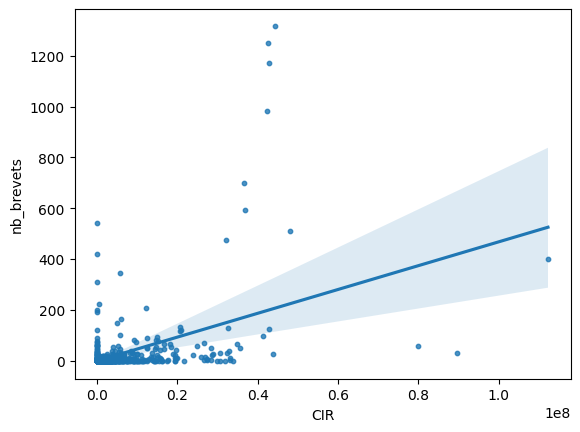

In [1153]:
import seaborn as sns
import matplotlib.pyplot as plt

# Exemple de graphique de régression avec des points plus petits
sns.regplot(data=panel, x='CIR', y='nb_brevets', scatter_kws={'s': 10})

# Afficher le graphique
plt.show()

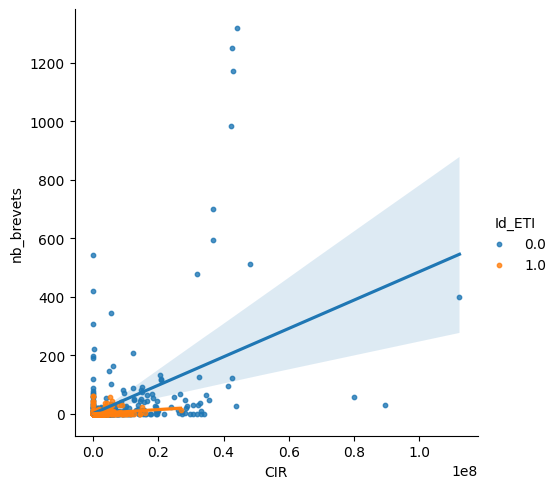

In [1154]:
import seaborn as sns

# Utiliser sns.lmplot pour créer des régressions séparées pour ETI et GE avec des points plus petits
sns.lmplot(data=panel, x='CIR', y='nb_brevets', hue='Id_ETI', scatter_kws={'s': 10})


# Deuxième tentative de régression

In [1155]:
panel_0_1 = panel_0_1.drop(columns=[ 'categorieEntreprise','dateCreationUniteLegale'])
panel = panel.drop(columns=['categorieEntreprise','dateCreationUniteLegale'])

In [1156]:
panel_0_1['nb_brevets'] = panel_0_1['nb_brevets'].fillna(0)
panel_0_1['RetD'] = panel_0_1.apply(lambda row: row['nb_brevets'] if row['annee'] == 2016 else 0, axis=1)
panel_0_1 = panel_0_1.dropna(subset=['CIR'])
panel['nb_brevets'] = panel['nb_brevets'].fillna(0)
panel['RetD'] = panel.apply(lambda row: row['nb_brevets'] if row['annee'] == 2016 else 0, axis=1)
panel= panel.dropna(subset=['CIR'])

In [1157]:
panel_0_1.isna().sum()

siren             0
division          0
annee             0
CIR               0
nb_brevets        0
Id_ETI            0
annee_creation    0
RetD              0
dtype: int64

**Modèle linéaire :**

In [1158]:
model = smf.ols('CIR ~ C(division,Treatment("72")) + C(annee) + Id_ETI + annee_creation + RetD', data=panel_0_1)

# Ajuster le modèle
result = model.fit()

# Résumé des résultats
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    CIR   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     39.01
Date:                Wed, 13 Nov 2024   Prob (F-statistic):          1.67e-161
Time:                        14:46:37   Log-Likelihood:                -7525.4
No. Observations:               12584   AIC:                         1.510e+04
Df Residuals:                   12561   BIC:                         1.527e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

**Modèle logit :**

Le modèle parvient à converger pour la régression : 
$$ CIR \sim  année +Id_{ETI} + annee_creation+ R\&D$$
Mais il ne parvient pas à converger lorsque l'on rajoute le secteur d'activité dans la regression.

In [1159]:
model = smf.logit('CIR ~  C(division,Treatment("72"))+ C(annee) + Id_ETI + annee_creation+ RetD', data=panel_0_1)

# Ajuster le modèle
result = model.fit(maxiter=500, tol=1e-5)

# Résumé des résultats
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.572064
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                    CIR   No. Observations:                12584
Model:                          Logit   Df Residuals:                    12561
Method:                           MLE   Df Model:                           22
Date:                Wed, 13 Nov 2024   Pseudo R-squ.:                 0.05315
Time:                        14:46:38   Log-Likelihood:                -7198.8
converged:                       True   LL-Null:                       -7603.0
Covariance Type:            nonrobust   LLR p-value:                1.027e-156
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                             15.0867      1.980    

Essayons de réduire le nombre de secteurs : 

**Modèle probit :**

In [1160]:
model = smf.probit('CIR ~ C(division,Treatment("72")) + C(annee) + Id_ETI + annee_creation + RetD', data=panel_0_1)

# Ajuster le modèle
result = model.fit()

# Résumé des résultats
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.571944
         Iterations 6
                          Probit Regression Results                           
Dep. Variable:                    CIR   No. Observations:                12584
Model:                         Probit   Df Residuals:                    12561
Method:                           MLE   Df Model:                           22
Date:                Wed, 13 Nov 2024   Pseudo R-squ.:                 0.05335
Time:                        14:46:38   Log-Likelihood:                -7197.3
converged:                       True   LL-Null:                       -7603.0
Covariance Type:            nonrobust   LLR p-value:                2.366e-157
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                              9.2557      1.197    

**Regression sur le montant du CIR :** 

In [1161]:
model = smf.ols('CIR ~ C(division,Treatment("72")) + C(annee) + Id_ETI + annee_creation + RetD', data=panel)

# Ajuster le modèle
result = model.fit()

# Résumé des résultats
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    CIR   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     18.91
Date:                Wed, 13 Nov 2024   Prob (F-statistic):           4.85e-73
Time:                        14:46:39   Log-Likelihood:            -2.0724e+05
No. Observations:               12248   AIC:                         4.145e+05
Df Residuals:                   12225   BIC:                         4.147e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

In [1170]:
panel

division       CIR  nb_brevets  Id_ETI  annee_creation  \
siren     annee                                                               
400054383 2017-01-01       71       0.0         0.0     0.0          1994.0   
          2018-01-01       71       0.0         0.0     0.0          1994.0   
          2019-01-01       71       0.0         0.0     0.0          1994.0   
          2020-01-01       71   48413.0         0.0     0.0          1994.0   
          2021-01-01       71       0.0         0.0     0.0          1994.0   
...                       ...       ...         ...     ...             ...   
986120186 2019-01-01       20       0.0         0.0     0.0          1961.0   
          2020-01-01       20  116334.0         0.0     0.0          1961.0   
          2021-01-01       20       0.0         0.0     0.0          1961.0   
          2022-01-01       20       0.0         0.0     0.0          1961.0   
          2023-01-01       20       0.0         0.0     0.0          1961.0   

                      RetD   CIR_t_1  
siren     annee                       
400054383 2017-01-01   0.0       0.0  
          2018-01-01   0.0       0.0  
          2019-01-01   0.0       0.0  
          2020-01-01   0.0       0.0  
          2021-01-01   0.0   48413.0  
...                    ...       ...  
986120186 2019-01-01   0.0       0.0  
          2020-01-01   0.0       0.0  
          2021-01-01   0.0  116334.0  
          2022-01-01   0.0       0.0  
          2023-01-01   0.0       0.0  

[10717 rows x 7 columns]

In [1165]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from linearmodels import PanelOLS
# Exemple de préparation des données
panel['annee'] = pd.to_datetime(panel['annee'], format='%Y')  # Assurez-vous que 'year' est au format datetime si ce n'est pas déjà le cas.
panel = panel.set_index(['siren', 'annee'])
model = PanelOLS.from_formula('np.log(1+nb_brevets) ~ CIR + EntityEffects + TimeEffects', data=panel)
results = model.fit()
print(results)

                            PanelOLS Estimation Summary                             
Dep. Variable:     np.log(1 + nb_brevets)   R-squared:                        0.0028
Estimator:                       PanelOLS   R-squared (Between):              0.0266
No. Observations:                   12248   R-squared (Within):               0.0025
Date:                    Wed, Nov 13 2024   R-squared (Overall):              0.0194
Time:                            14:46:56   Log-likelihood                   -1603.8
Cov. Estimator:                Unadjusted                                           
                                            F-statistic:                      29.951
Entities:                            1531   P-value                           0.0000
Avg Obs:                           8.0000   Distribution:                 F(1,10709)
Min Obs:                           8.0000                                           
Max Obs:                           8.0000   F-statistic (robust):

In [1166]:
# Filtrer les données pour les ETI et GE
panel_eti = panel[panel['Id_ETI'] == 1]
panel_ge = panel[panel['Id_ETI'] == 0]

# Modèle pour les ETI
model_eti = PanelOLS.from_formula('np.log(1+nb_brevets) ~ CIR + EntityEffects + TimeEffects', data=panel_eti)
results_eti = model_eti.fit()

# Modèle pour les GE
model_ge = PanelOLS.from_formula('np.log(1+nb_brevets) ~ CIR + EntityEffects + TimeEffects', data=panel_ge)
results_ge = model_ge.fit()

# Afficher les résultats
print("Résultats pour les ETI :")
print(results_eti)

print("Résultats pour les GE :")
print(results_ge)

Résultats pour les ETI :
                            PanelOLS Estimation Summary                             
Dep. Variable:     np.log(1 + nb_brevets)   R-squared:                     1.856e-05
Estimator:                       PanelOLS   R-squared (Between):             -0.0027
No. Observations:                    8400   R-squared (Within):             7.95e-05
Date:                    Wed, Nov 13 2024   R-squared (Overall):             -0.0015
Time:                            14:46:57   Log-likelihood                    1025.7
Cov. Estimator:                Unadjusted                                           
                                            F-statistic:                      0.1363
Entities:                            1050   P-value                           0.7120
Avg Obs:                           8.0000   Distribution:                  F(1,7342)
Min Obs:                           8.0000                                           
Max Obs:                           8.000

In [1167]:
print(len( panel_eti), len(panel_ge))

8400 3848


In [1168]:
# 1. Décaler `CIR` de 1 an pour chaque `siren` en utilisant l'index multi-niveau
panel['CIR_t_1'] = panel.groupby(level='siren')['CIR'].shift(1)

# 2. Supprimer les lignes avec des valeurs manquantes dans `CIR_t_1` et `nb_brevets`
panel= panel.dropna(subset=['CIR_t_1', 'nb_brevets'])

In [1169]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from linearmodels import PanelOLS

model = PanelOLS.from_formula('nb_brevets ~ CIR_t_1 + EntityEffects + TimeEffects', data=panel)
results = model.fit()
print(results)

                          PanelOLS Estimation Summary                           
Dep. Variable:             nb_brevets   R-squared:                        0.0003
Estimator:                   PanelOLS   R-squared (Between):             -0.0093
No. Observations:               10717   R-squared (Within):               0.0003
Date:                Wed, Nov 13 2024   R-squared (Overall):             -0.0058
Time:                        14:46:57   Log-likelihood                -4.399e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      2.5042
Entities:                        1531   P-value                           0.1136
Avg Obs:                       7.0000   Distribution:                  F(1,9179)
Min Obs:                       7.0000                                           
Max Obs:                       7.0000   F-statistic (robust):             2.5042
                            

Coefficient négatif > ce n'est pas très significatifs 

Le nombre de brevets, de CIR  par secteur, taille

log dans les regressions

distribution du nombre moyen de brevets par an 

distributiuon par entreprise en moyen par 
3D brevets et CIR et la distribution

In [ ]:
An economist's Guide to Visualizing Data